# Tugas
1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv. 
2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
Menggunakan data spam.csv
Fitur CountVectorizer dengan mengaktifkan stop_words
Evaluasi hasilnya
3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
Menggunakan data spam.csv
Fitur TF-IDF dengan mengaktifkan stop_words
Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [27]:
# math
import numpy as np
import pandas as pd
# visualiztion
import matplotlib.pyplot as plt
import seaborn as sns
# preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# model selection
from sklearn.svm import SVC
from sklearn import metrics




data = pd.read_csv('data/voice.csv') 
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [28]:
# encoding label
# male -> 1
# female -> 0
le = LabelEncoder()
data['label']=le.fit_transform(data['label'])

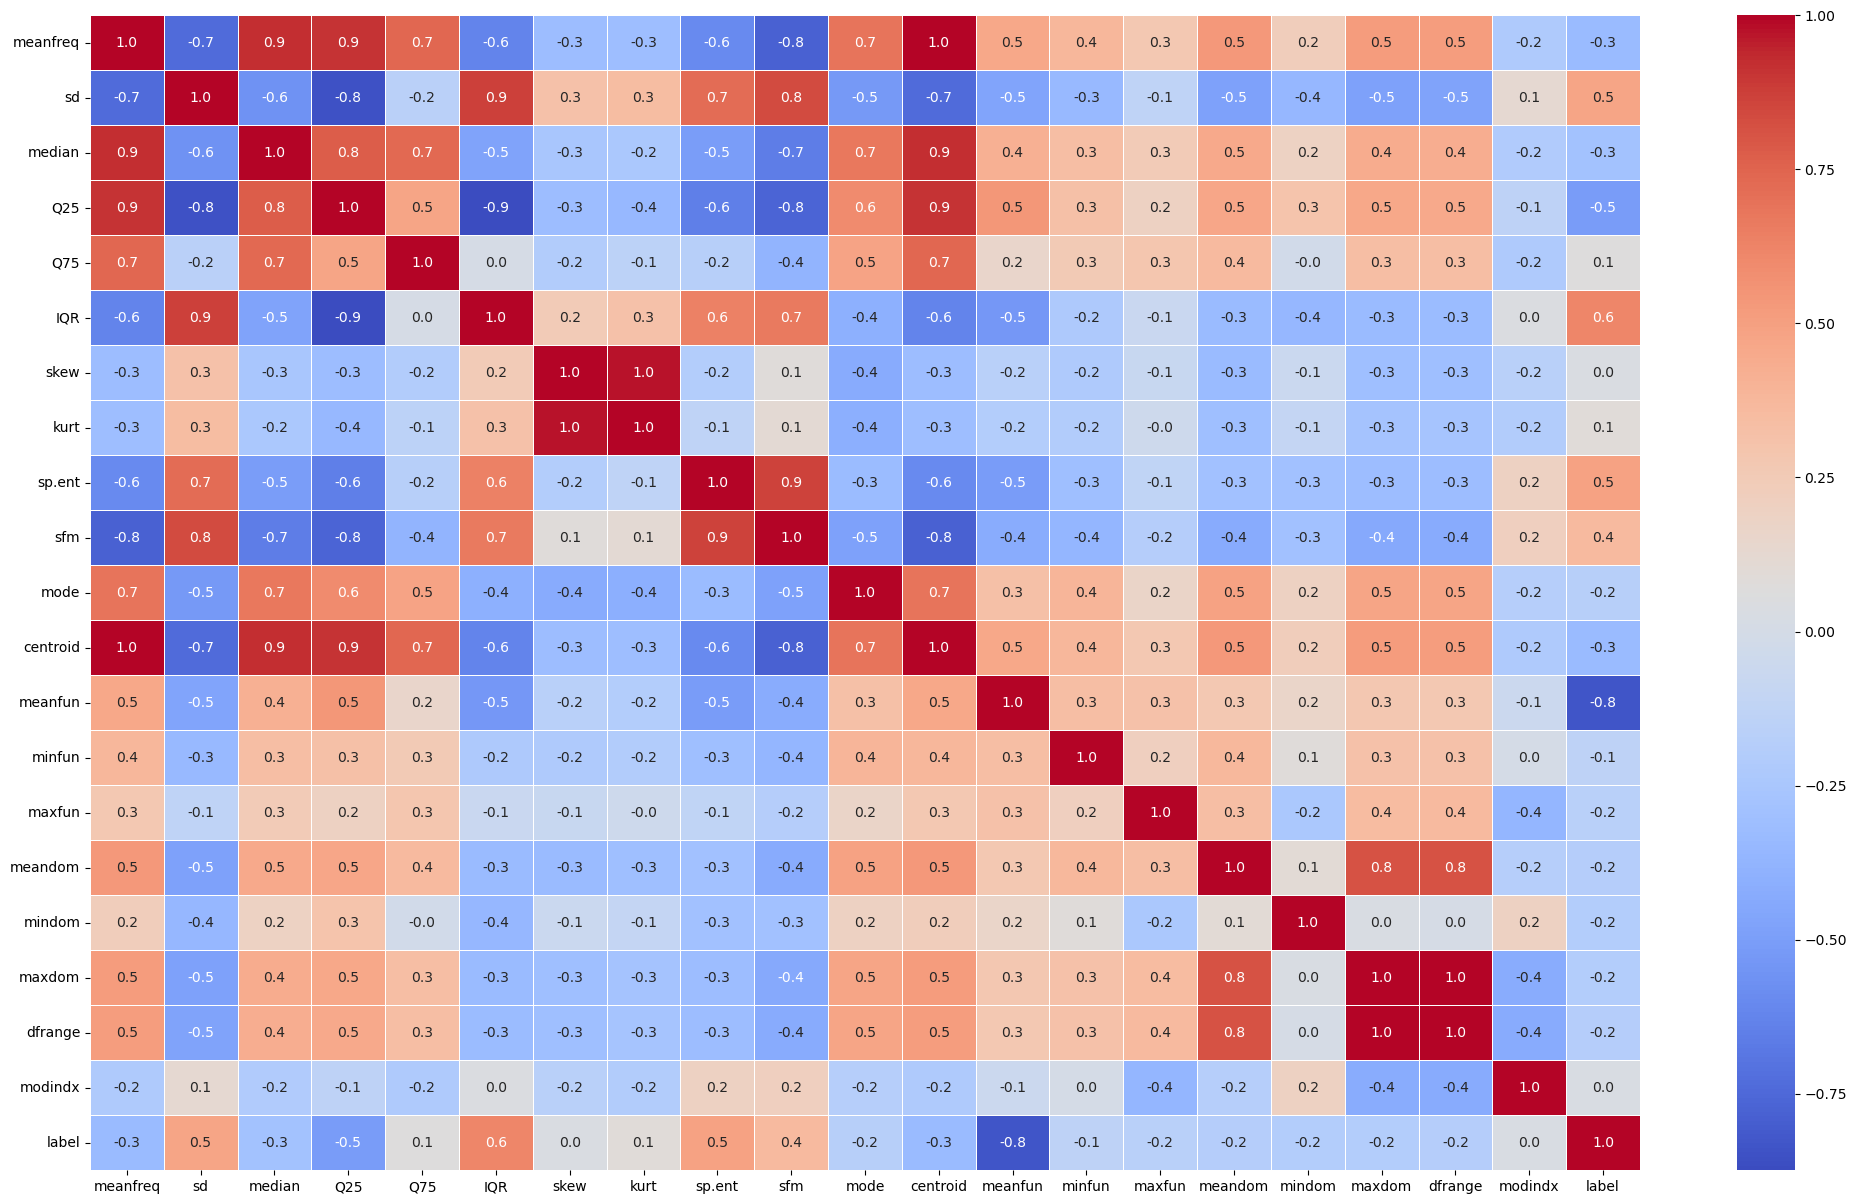

In [29]:
#visualiasi heatmap data
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,cmap='coolwarm', fmt= '.1f',ax=ax)
plt.show()

In [30]:
correlation_matrix = data.corr()['label']
high_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
print(high_correlations)


Q25       -0.511455
IQR        0.618916
meanfun   -0.833921
label      1.000000
Name: label, dtype: float64


In [31]:
# membagi data ke variabel x dan y
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [32]:
# Standarisasi
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[-4.04924806  0.4273553  -4.22490077 ... -1.43142165 -1.41913712
  -1.45477229]
 [-3.84105325  0.6116695  -3.99929342 ... -1.41810716 -1.4058184
  -1.01410294]
 [-3.46306647  1.60384791 -4.09585052 ... -1.42920257 -1.41691733
  -1.06534356]
 ...
 [-1.29877326  2.32272355 -0.05197279 ... -0.5992661  -0.58671739
   0.17588664]
 [-1.2452018   2.012196   -0.01772849 ... -0.41286326 -0.40025537
   1.14916112]
 [-0.51474626  2.14765111 -0.07087873 ... -1.27608595 -1.2637521
   1.47567886]]


In [33]:
# Rasio 8:2 dengan random state 42
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size = 0.2,random_state=42)

In [34]:
# model SVM kernel default (rbf)
rbf_svm=SVC(kernel='rbf')
rbf_svm.fit(X_train,y_train)
rbf_y_pred=rbf_svm.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,rbf_y_pred))

Accuracy Score:
0.9826498422712934


In [35]:
# model SVM kernel linear
linear_svm=SVC(kernel='linear')
linear_svm.fit(X_train,y_train)
linear_y_pred=linear_svm.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,linear_y_pred))

Accuracy Score:
0.9763406940063092


In [36]:
# model SVM kernel polynomial
polynomial_svm=SVC(kernel='poly')
polynomial_svm.fit(X_train,y_train)
polynomial_y_pred=polynomial_svm.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,polynomial_y_pred))

Accuracy Score:
0.9684542586750788


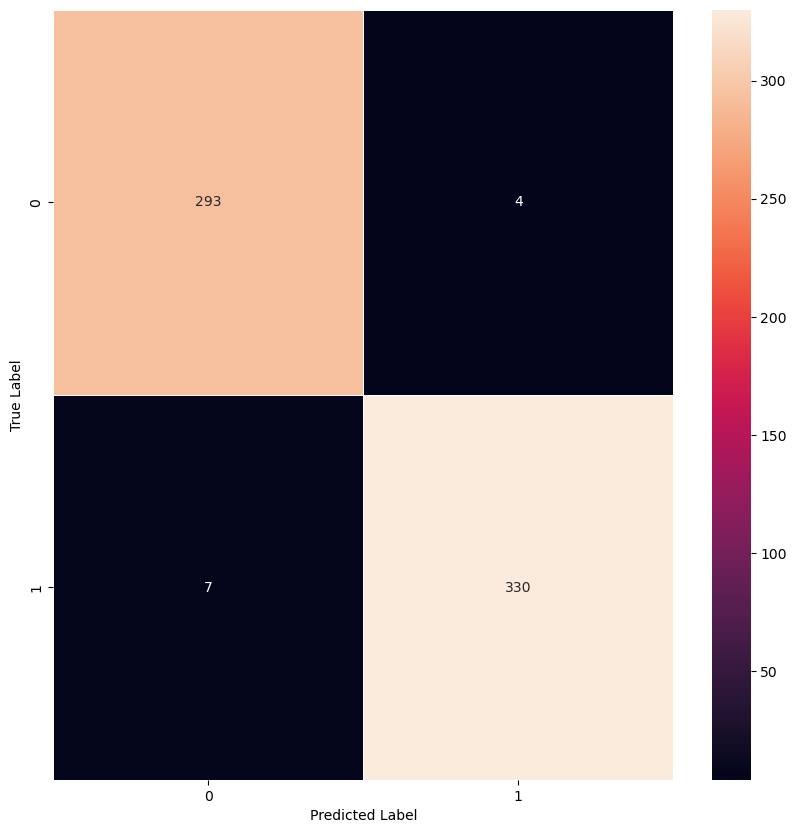

In [37]:
# male -> 1
# female -> 0
cm = metrics.confusion_matrix(y_test, rbf_y_pred)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5, fmt= '.0f',ax=ax)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [38]:
print (metrics.classification_report(y_test, rbf_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       297
           1       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

